In [150]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [151]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [153]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [154]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<Axes: >

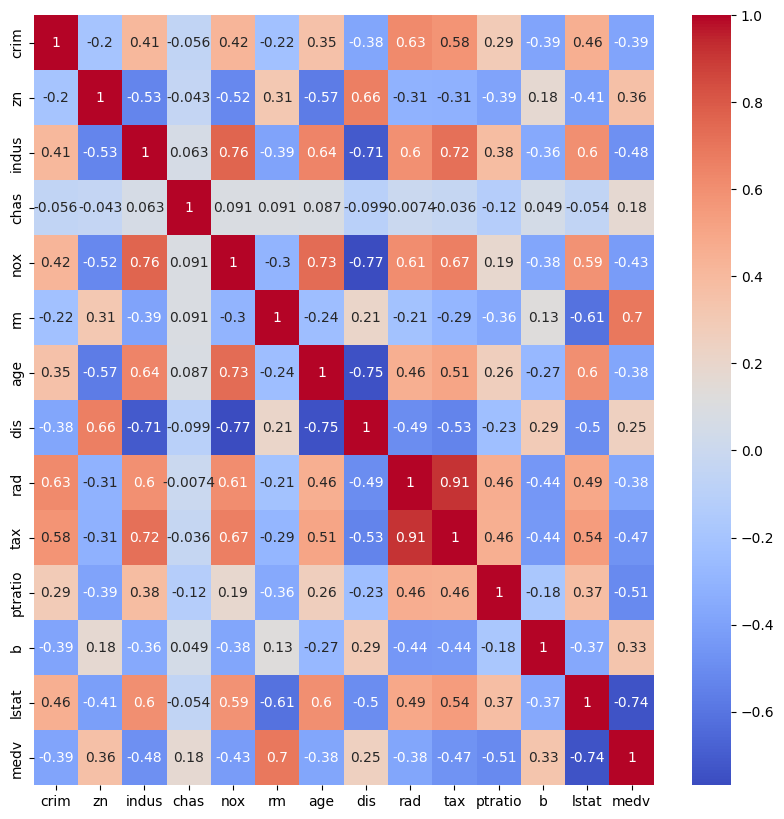

In [155]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [156]:
X=pd.DataFrame(df.rm)
y=df.medv

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

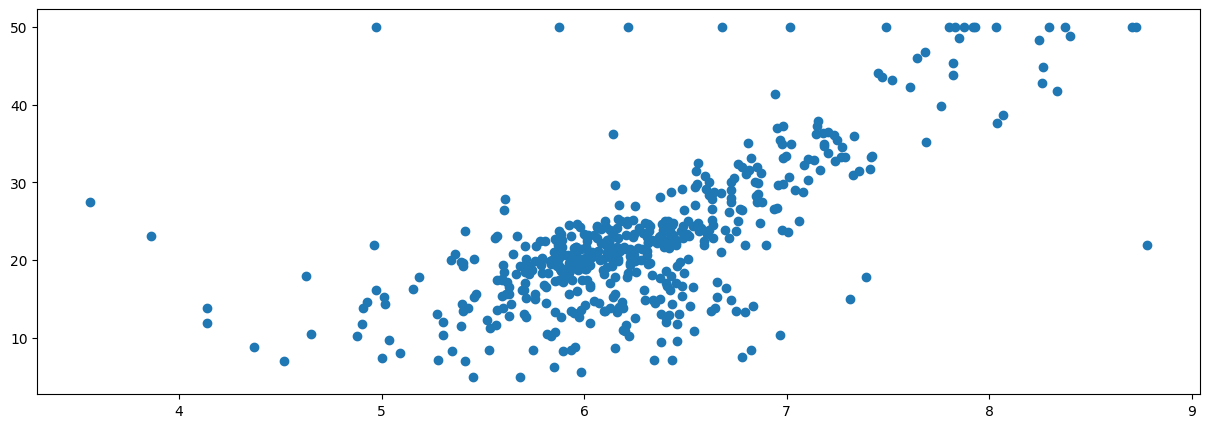

In [159]:
plt.figure(figsize=(15,5))
plt.scatter(X,y)

### Visualizing relation between independent and independent variable

In [160]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [161]:
from sklearn.linear_model import LinearRegression

In [162]:
lr=LinearRegression()

In [163]:
lr.fit(X_train,y_train)

LinearRegression()

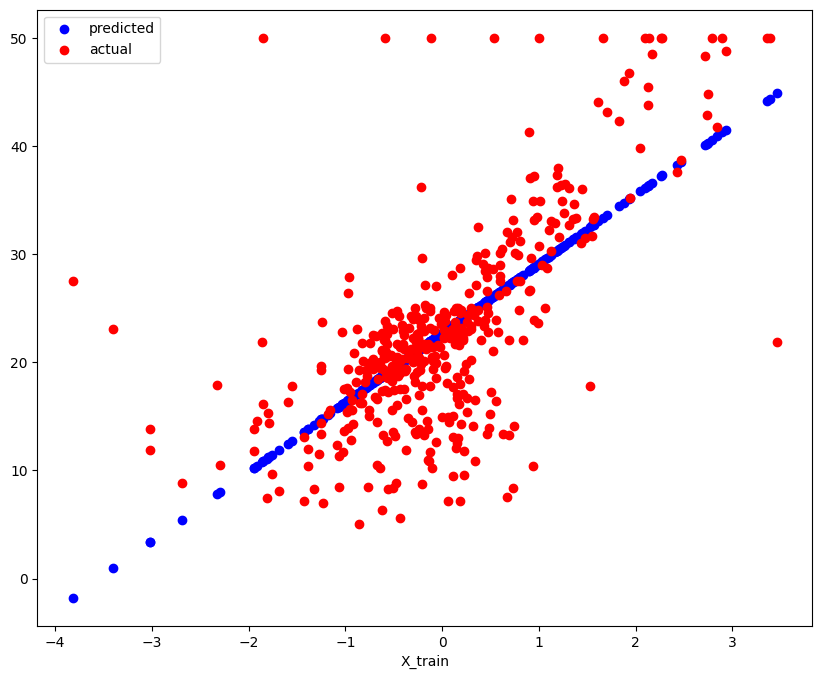

In [164]:
plt.figure(figsize=(10,8))
plt.scatter(X_train,lr.predict(X_train),c='b',label='predicted')
plt.scatter(X_train,y_train,c='r',label='actual')
plt.xlabel("X_train")
plt.legend()

### Plot to visualize how model performs on training data

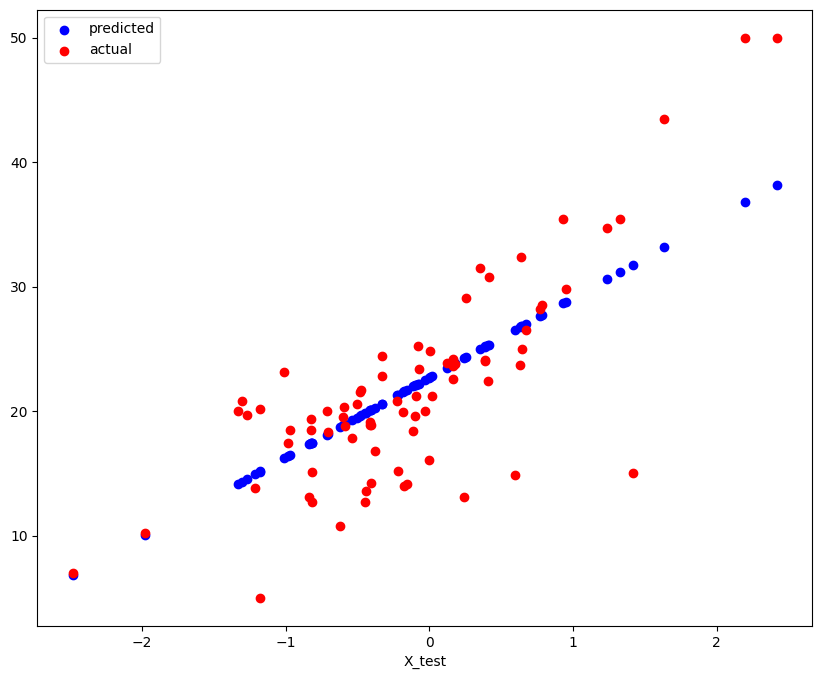

In [165]:
plt.figure(figsize=(10,8))
plt.scatter(X_test,lr.predict(X_test),c='b',label='predicted')
plt.scatter(X_test,y_test,c='r',label='actual')
plt.xlabel("X_test")
plt.legend()

### Plot to visulaize performance on testing data

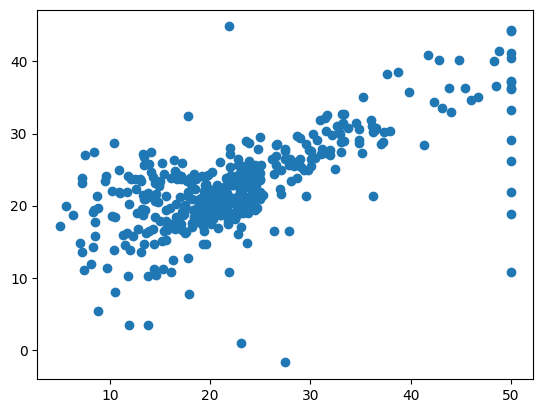

In [166]:
plt.scatter(y_train,lr.predict(X_train))

### Actual vs Predicted for training data

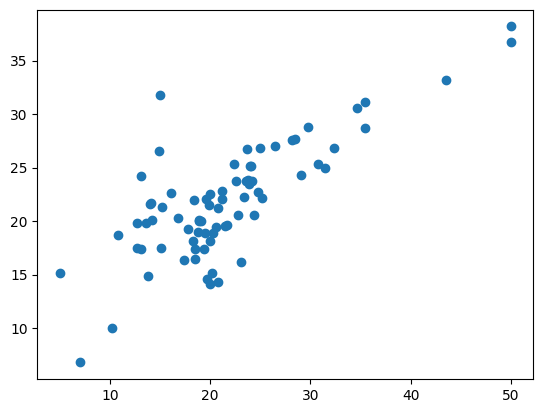

In [167]:
plt.scatter(y_test,lr.predict(X_test))

### Actual Vs. Predicted for testing data

In [168]:
y_pred=lr.predict(X_test)

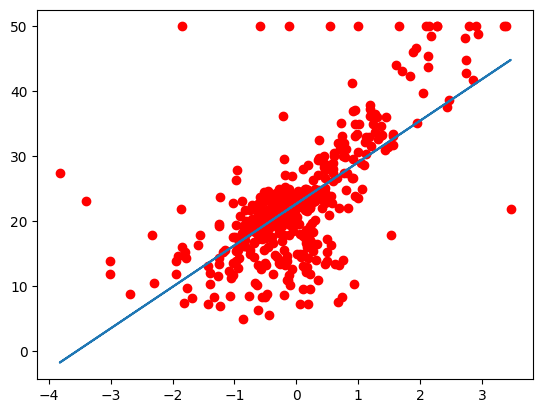

In [169]:
plt.scatter(X_train,y_train,c='r')
plt.plot(X_train,lr.predict(X_train))

### visulaizing regression line of single variable linear model

In [170]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [192]:
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
rmse=mse**0.5

In [193]:
print(f"r2_score= {r2}, mean absolute error = {mae}, mean squared error = {mse}, rmse = {rmse}")

r2_score= 0.7102826301110761, mean absolute error = 3.398335975923209, mean squared error = 18.919647747884117, rmse = 4.34967214257398


In [173]:
X=df[['rm','b','lstat']]
y=df['medv']

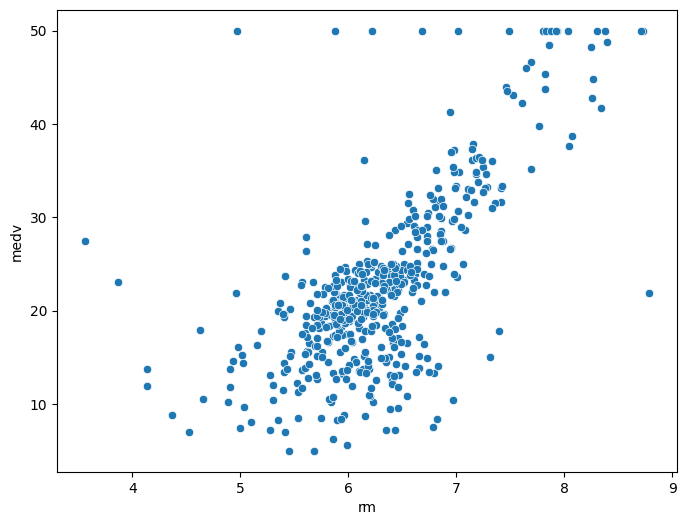

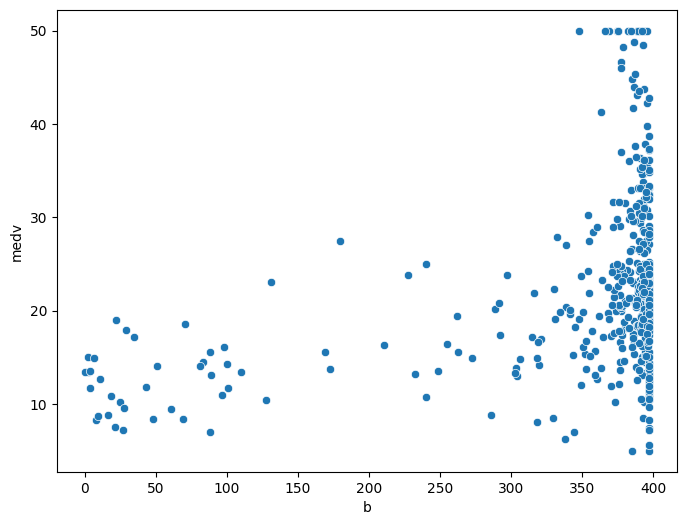

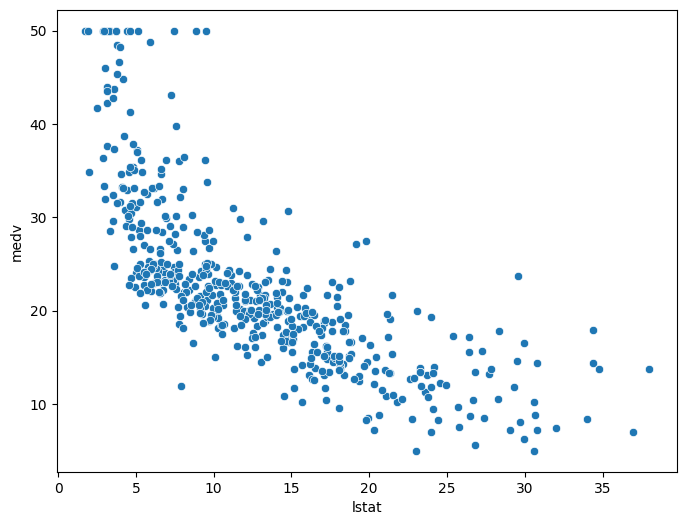

In [174]:

for col in X.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=col,y='medv',data=df)

### Visualizing the relation between independent variables and dependent variable

In [175]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.15, random_state=42)

In [176]:
lr.fit(X_train,y_train)

LinearRegression()

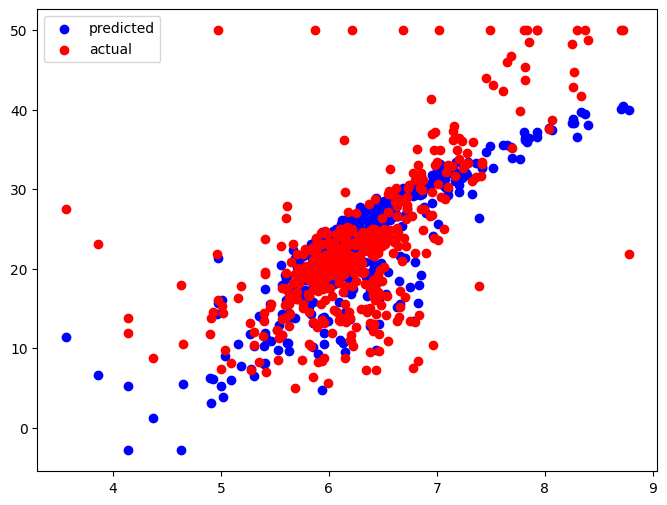

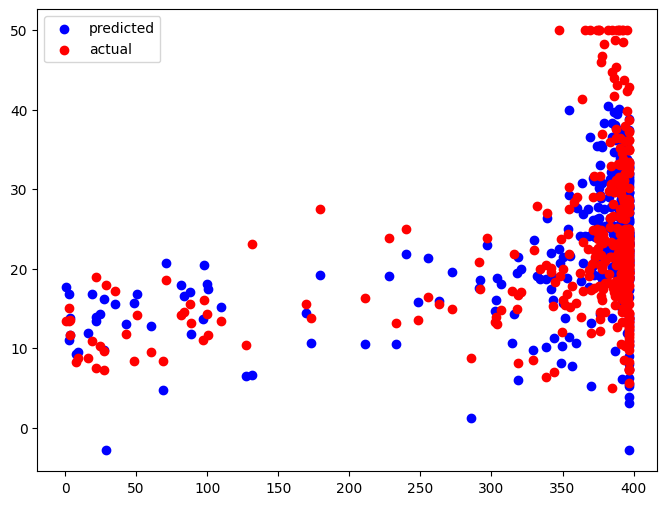

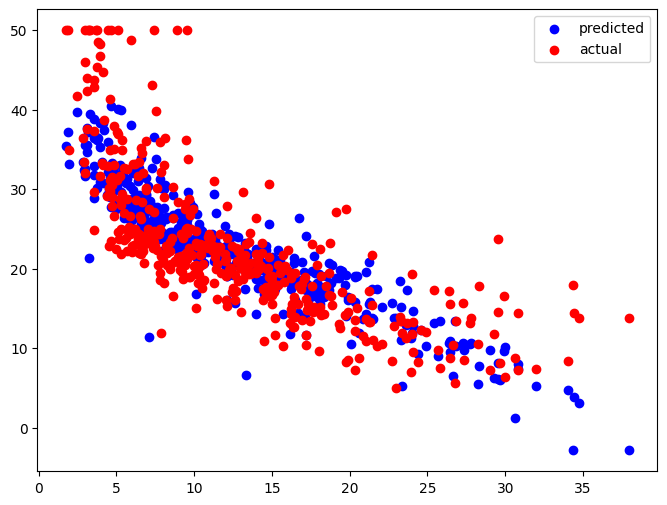

In [177]:
for cols in X.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(X_train[cols],lr.predict(X_train),c='b',label='predicted')
    plt.scatter(X_train[cols],y_train,c='r',label='actual')
    plt.legend()
    plt.show()

### Visualizing performance of multi-linear model on training dataset

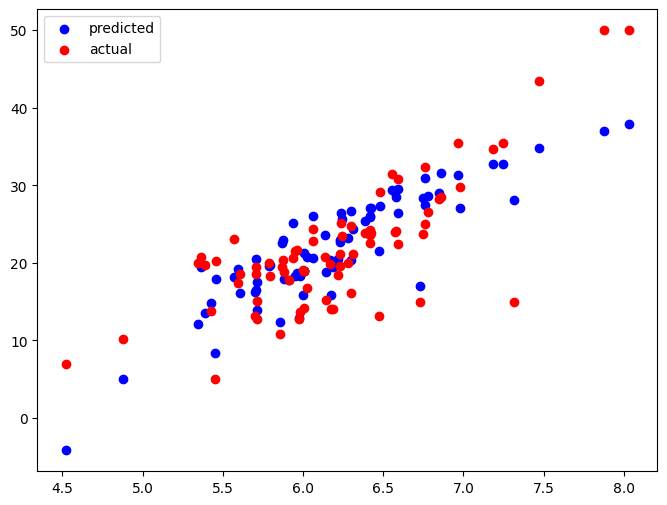

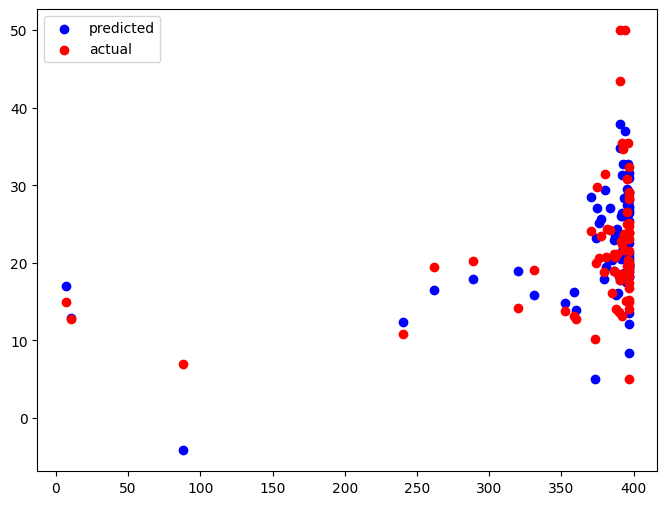

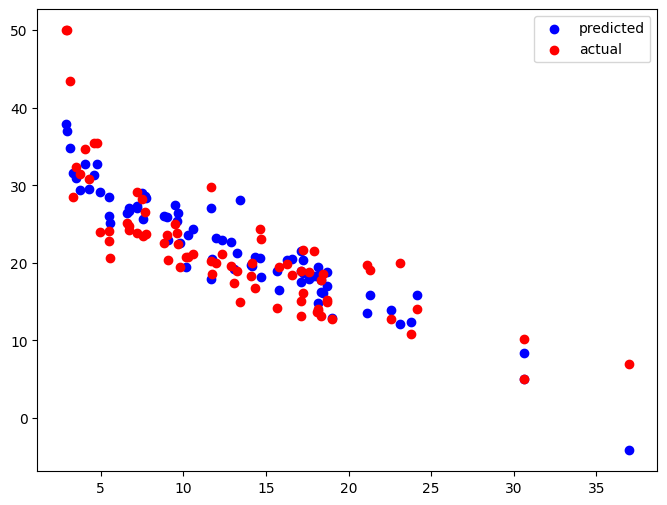

In [178]:
for cols in X.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(X_test[cols],lr.predict(X_test),c='b',label='predicted')
    plt.scatter(X_test[cols],y_test,c='r',label='actual')
    plt.legend()
    plt.show()

### Visualizing the performance of multi-linear model on testing data

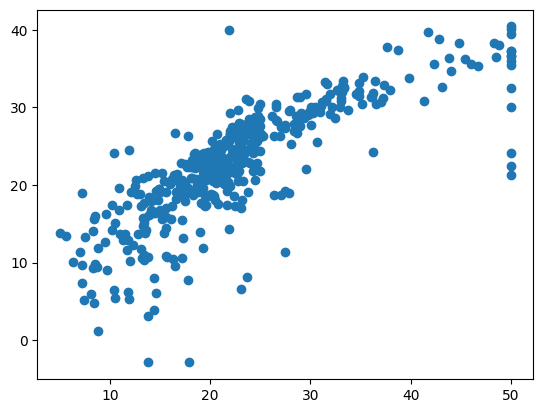

In [181]:
plt.scatter(y_train,lr.predict(X_train))

### Prediction vs. Actual

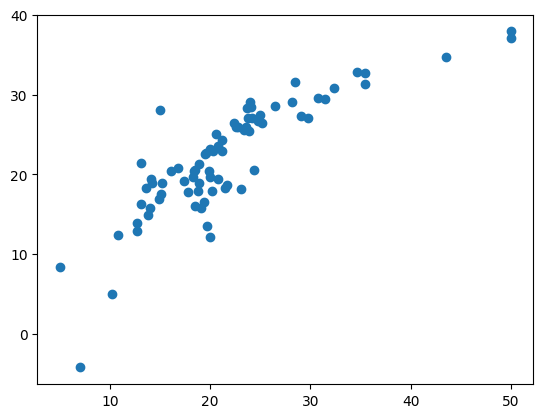

In [182]:
plt.scatter(y_test,lr.predict(X_test))

### Prediction vs. Actual on testing dataset

In [184]:
y_pred=lr.predict(X_test)

<Axes: xlabel='medv'>

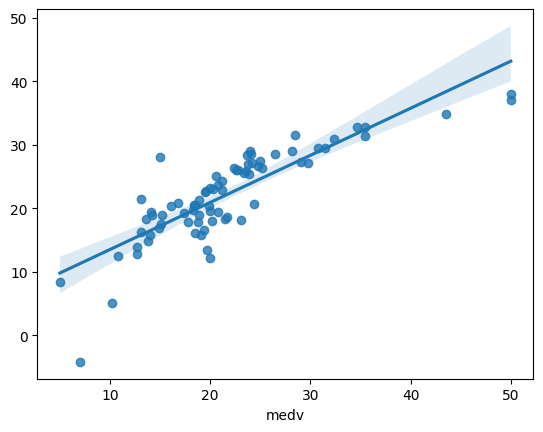

In [188]:
sns.regplot(x=y_test, y=y_pred)


### Regplot

In [194]:
r2_multi=r2_score(y_test,y_pred)
mse_multi=mean_squared_error(y_test,y_pred)
mae_multi=mean_absolute_error(y_test,y_pred)
rmse=(mse_multi)**0.5

print(f"r2_score= {r2_multi}, mean absolute error = {mae_multi}, mean squared error = {mse_multi}, rmse = {rmse}")

r2_score= 0.7102826301110761, mean absolute error = 3.398335975923209, mean squared error = 18.919647747884117, rmse = 4.34967214257398


The multi regression model performs better than the single regression model,
this is because the multi regression model takes into factor multiple features which affect the outcome